data source : https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('Covid global data.csv')

In [3]:
data.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-08-31 04:28:27,33.93911,67.709953,38162,1402,29089,7671.0,Afghanistan,98.031406,3.673812
1,NaN,NaN,NaN,Albania,2020-08-31 04:28:27,41.15330,20.168300,9380,280,5139,3961.0,Albania,325.943429,2.985075
2,NaN,NaN,NaN,Algeria,2020-08-31 04:28:27,28.03390,1.659600,44146,1501,30978,11667.0,Algeria,100.672634,3.400082
3,NaN,NaN,NaN,Andorra,2020-08-31 04:28:27,42.50630,1.521800,1124,53,902,169.0,Andorra,1454.733709,4.715302
4,NaN,NaN,NaN,Angola,2020-08-31 04:28:27,-11.20270,17.873900,2624,107,1063,1454.0,Angola,7.983870,4.077744
5,NaN,NaN,NaN,Antigua and Barbuda,2020-08-31 04:28:27,17.06080,-61.796400,94,3,91,0.0,Antigua and Barbuda,95.988890,3.191489
6,NaN,NaN,NaN,Argentina,2020-08-31 04:28:27,-38.41610,-63.616700,408426,8457,294007,105962.0,Argentina,903.681775,2.070632
7,NaN,NaN,NaN,Armenia,2020-08-31 04:28:27,40.06910,45.038200,43750,877,37650,5223.0,Armenia,1476.427444,2.004571
8,NaN,NaN,Australian Capital Territory,Australia,2020-08-31 04:28:27,-35.47350,149.012400,113,3,110,0.0,"Australian Capital Territory, Australia",26.395702,2.654867
9,NaN,NaN,New South Wales,Australia,2020-08-31 04:28:27,-33.86880,151.209300,4050,52,2994,1004.0,"New South Wales, Australia",49.889135,1.283951


### Checking shape of the data

In [4]:
data.shape

(3950, 14)

### Removing excess columns

In [5]:
data.drop(['FIPS','Admin2',"Last_Update","Lat","Long_",'Combined_Key'], axis = 1, inplace = True)

In [6]:
data

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,38162,1402,29089,7671.0,98.031406,3.673812
1,NaN,Albania,9380,280,5139,3961.0,325.943429,2.985075
2,NaN,Algeria,44146,1501,30978,11667.0,100.672634,3.400082
3,NaN,Andorra,1124,53,902,169.0,1454.733709,4.715302
4,NaN,Angola,2624,107,1063,1454.0,7.983870,4.077744
...,...,...,...,...,...,...,...,...
3945,NaN,West Bank and Gaza,22204,152,14787,7265.0,435.251703,0.684561
3946,NaN,Western Sahara,10,1,8,1.0,1.674116,10.000000
3947,NaN,Yemen,1953,564,1123,266.0,6.547985,28.878648
3948,NaN,Zambia,12025,287,11454,284.0,65.410296,2.386694


### Aggregating rows w.r.t. countries

In [7]:
data_agg = data.groupby('Country_Region').sum()
data_agg

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
Afghanistan,38162,1402,29089,7671.0,98.031406,3.673812
Albania,9380,280,5139,3961.0,325.943429,2.985075
Algeria,44146,1501,30978,11667.0,100.672634,3.400082
Andorra,1124,53,902,169.0,1454.733709,4.715302
Angola,2624,107,1063,1454.0,7.983870,4.077744
...,...,...,...,...,...,...
West Bank and Gaza,22204,152,14787,7265.0,435.251703,0.684561
Western Sahara,10,1,8,1.0,1.674116,10.000000
Yemen,1953,564,1123,266.0,6.547985,28.878648


### Rounding off our data

In [8]:
data_agg.round(decimals= 2)

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
Afghanistan,38162,1402,29089,7671.0,98.03,3.67
Albania,9380,280,5139,3961.0,325.94,2.99
Algeria,44146,1501,30978,11667.0,100.67,3.40
Andorra,1124,53,902,169.0,1454.73,4.72
Angola,2624,107,1063,1454.0,7.98,4.08
...,...,...,...,...,...,...
West Bank and Gaza,22204,152,14787,7265.0,435.25,0.68
Western Sahara,10,1,8,1.0,1.67,10.00
Yemen,1953,564,1123,266.0,6.55,28.88


## Ploting the data in Pie Chart

In [9]:
deaths_in = data_agg.loc["India"].Deaths
recovered_in = data_agg.loc["India"].Recovered
active_in = data_agg.loc["India"].Active


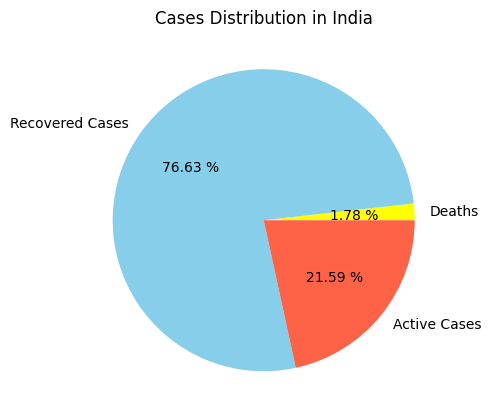

In [37]:
plt.figure(figsize=(8,5), dpi=100)

labels = ["Deaths", "Recovered Cases", "Active Cases"]
explode = [.0, .0, .0]
color = ["yellow", "skyblue", "tomato"]

plt.pie([deaths_in, recovered_in, active_in], labels = labels, colors = color, explode=explode,autopct = '%.2f %%')

plt.title('Cases Distribution in India')

plt.show()

Through this pie chart we can understand the current covid-19 scenario in India. This chart implies that the recovery rate in India is above 75% (31-08-20) and the active cases are also just above 20% whereas, deaths contributes to approx 1.8%.

## Compairing Incidence Rate of Countries through Bar Graph

In [28]:
india_ir = data_agg.loc["India"].Incidence_Rate
spain_ir = data_agg.loc["Spain"].Incidence_Rate
brazil_ir = data_agg.loc["Brazil"].Incidence_Rate
italy_ir = data_agg.loc["Italy"].Incidence_Rate
japan_ir = data_agg.loc["Japan"].Incidence_Rate


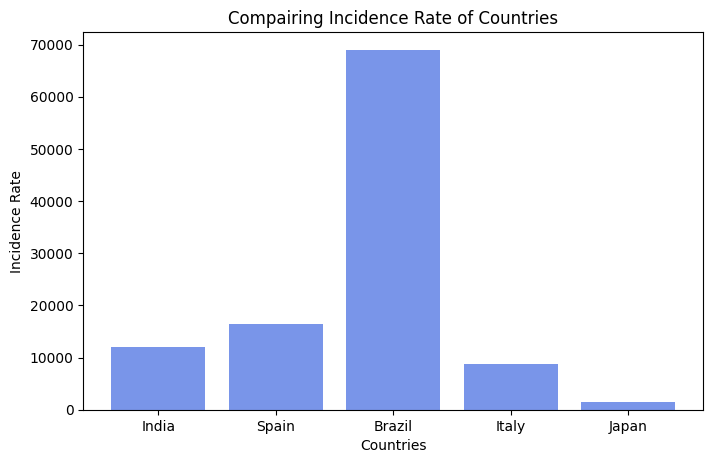

In [38]:
plt.figure(figsize=(8,5), dpi=100)

values = [ india_ir, spain_ir, brazil_ir, italy_ir, japan_ir]
labels = ["India", "Spain", "Brazil", "Italy", "Japan"]

plt.bar(labels,values, color='royalblue', alpha=0.7)

plt.title("Compairing Incidence Rate of Countries")
plt.ylabel('Incidence Rate')
plt.xlabel('Countries')

plt.show()

From this bar graph we can that getting covid-19 is very high in Brazil as compare to Japan.

Know more about incidence rate here : https://www.investopedia.com/terms/i/incidence-rate.asp

## Compairing Case Fatality Ratio of different Countries

In [35]:
india_cfr = data_agg.loc["India"]['Case-Fatality_Ratio']
spain_cfr = data_agg.loc["Spain"]['Case-Fatality_Ratio']
brazil_cfr = data_agg.loc["Brazil"]['Case-Fatality_Ratio']
italy_cfr = data_agg.loc["Italy"]['Case-Fatality_Ratio']
japan_cfr = data_agg.loc["Japan"]['Case-Fatality_Ratio']


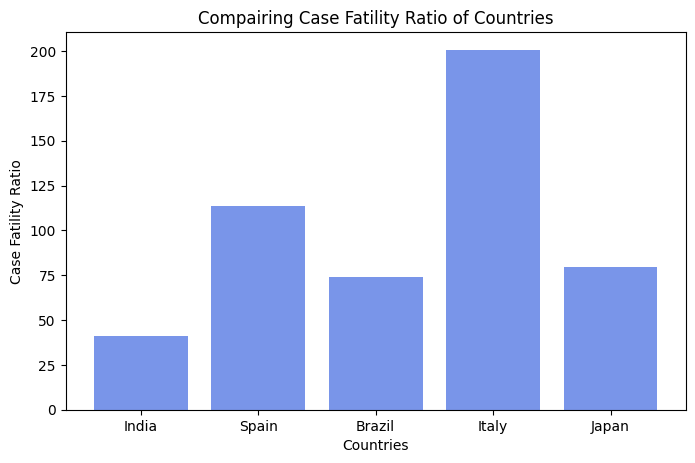

In [39]:
plt.figure(figsize=(8,5), dpi=100)

values = [ india_cfr, spain_cfr, brazil_cfr, italy_cfr, japan_cfr]
labels = ["India", "Spain", "Brazil", "Italy", "Japan"]

plt.bar(labels,values, color='royalblue', alpha=0.7)

plt.title("Compairing Case Fatility Ratio of Countries")
plt.ylabel('Case Fatility Ratio')
plt.xlabel('Countries')

plt.show()


Though chances of getting affected is very high in Brazil and very less in Japan but chance of dying from covid-19 is more in Japan as compare to Brazil.

Know mmore about Case Fatility Ratio/Rate here : https://www.britannica.com/science/case-fatality-rate

# Lastly, LET'S STAY APART TO DO OUR PART

###### By Shankhesh Jain

My GITHUB : https://github.com/Shankhesh-16